1. The change in price of the stock over time
2. The moving average of the various stocks
3. Seasonal decomposition
4. Accumulated returns
5. The daily return of the stock on average
6. The correlation between different stocks
7. Stability and Gain
8. Autocorrelation
9. Prediction

In [94]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pandas_datareader.data import DataReader

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")


In [207]:
# The stock list
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX','TWTR','ABNB','HPQ','SBUX','COST','GE','HNST']

# Set up end and start times 
end = datetime.now()
start = datetime(end.year, end.month-6, end.day)

# Read stock data, Close Price
df_close = DataReader(stock_list, 'yahoo', start, end)['Close']    
df_adj_close = DataReader(stock_list, 'yahoo', start, end)['Adj Close']    

In [3]:
df_close

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,TWTR,ABNB,HPQ,SBUX,COST,GE,HNST
Date,,,,,,,,,,,,
2021-02-22,126.000000,2064.879883,234.509995,3180.739990,533.780029,70.489998,195.339996,27.120001,101.809998,350.209991,100.000000,NaN
2021-02-23,125.860001,2070.860107,233.270004,3194.500000,546.150024,73.169998,187.589996,27.379999,101.370003,342.149994,100.720001,NaN
2021-02-24,125.349998,2095.169922,234.550003,3159.530029,553.409973,71.919998,200.199997,27.969999,104.379997,340.700012,104.959999,NaN
2021-02-25,120.989998,2031.359985,228.990005,3057.159912,546.700012,74.589996,182.059998,28.190001,103.470001,333.899994,102.080002,NaN
2021-02-26,121.260002,2036.859985,232.380005,3092.929932,538.849976,77.059998,206.350006,28.969999,108.029999,331.000000,100.320000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-16,151.119995,2778.320068,294.600006,3298.989990,517.919983,63.779999,148.570007,29.440001,117.540001,452.859985,103.349998,9.75
2021-08-17,150.190002,2746.010010,293.079987,3241.959961,518.909973,62.880001,143.899994,28.680000,116.570000,452.339996,101.620003,9.71
2021-08-18,146.360001,2731.399902,290.730011,3201.219971,521.869995,62.119999,146.740005,28.219999,115.680000,446.209991,101.410004,9.38


## 1. The change in price of the stock over time

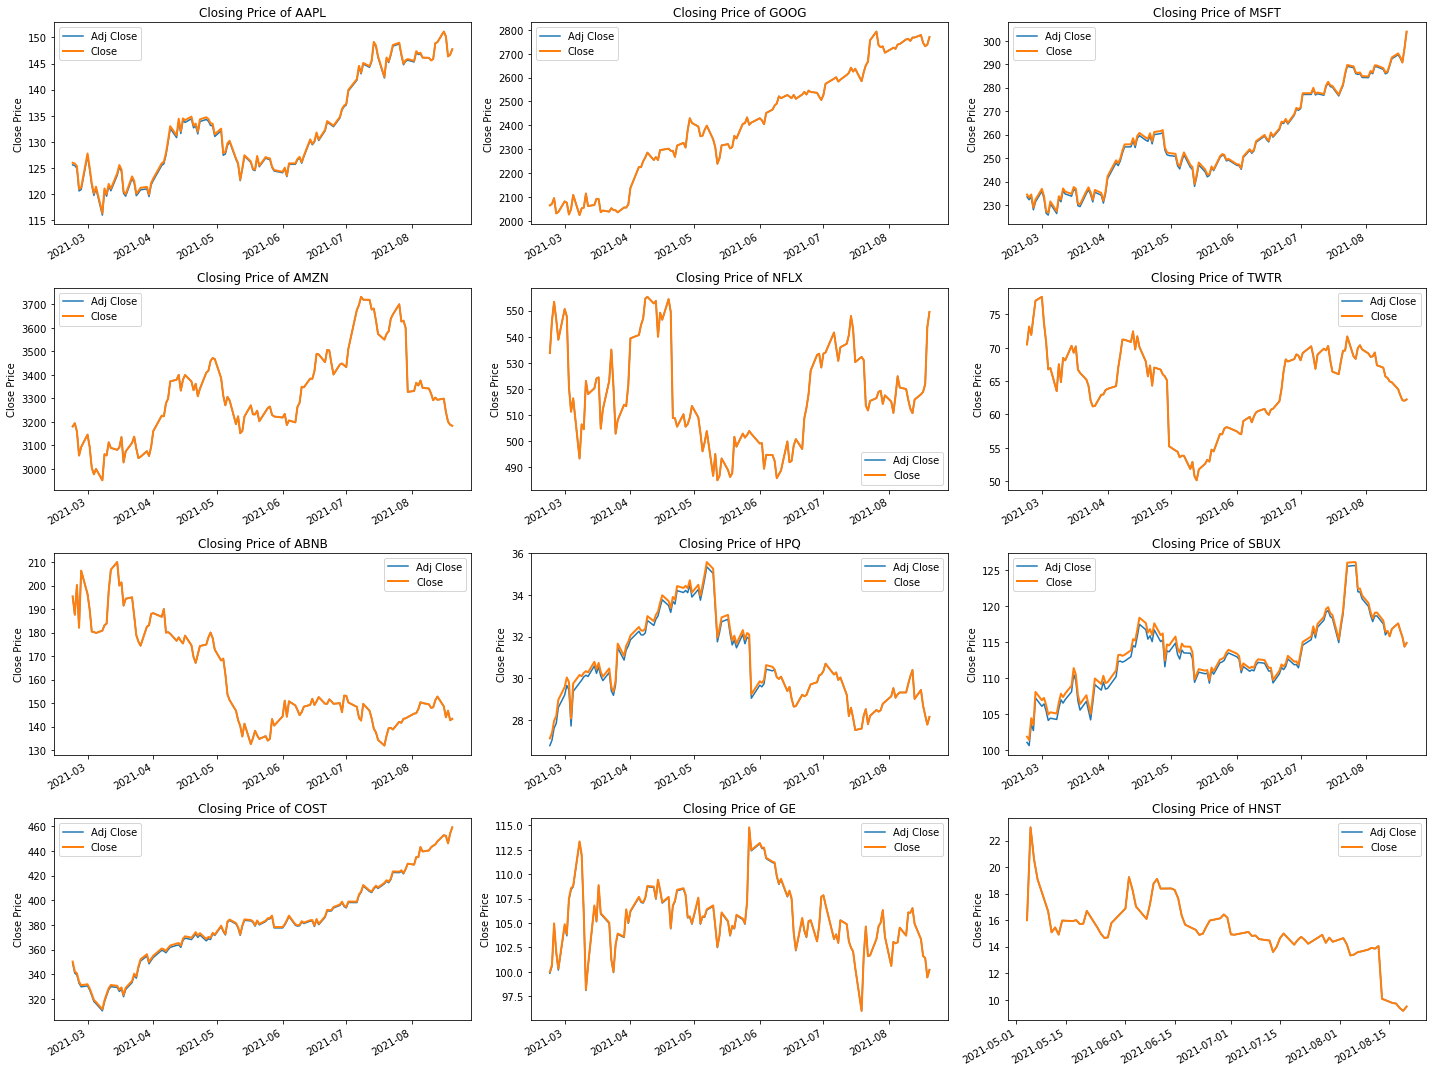

In [4]:
# Plotting a histrical view of the closing price

plt.figure(figsize=(20, 15))

for i, stock in enumerate(stock_list, 1):
    plt.subplot(4, 3, i)
    df_adj_close[stock].plot()
    df_close[stock].plot(linewidth=2)
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i - 1]}")
    plt.legend(['Adj Close', 'Close'])
    
plt.tight_layout()

- Each stock shows a different plot, and none of them seem to be fitted to a linear line or a quadratic curve. 
- Some show increasing trends for long-term observations so moving average or seasonal decomposition may help to see their trends by removing jitters.

## 2. The moving average of the stocks

In [5]:
ma_day = [5, 10, 20]
df_ma = pd.DataFrame()

for ma in ma_day:
    for stock in stock_list:
        column_name = f"{stock}: MA for {ma} days"
        df_ma[column_name] = df_adj_close[stock].rolling(ma, center=True).mean()

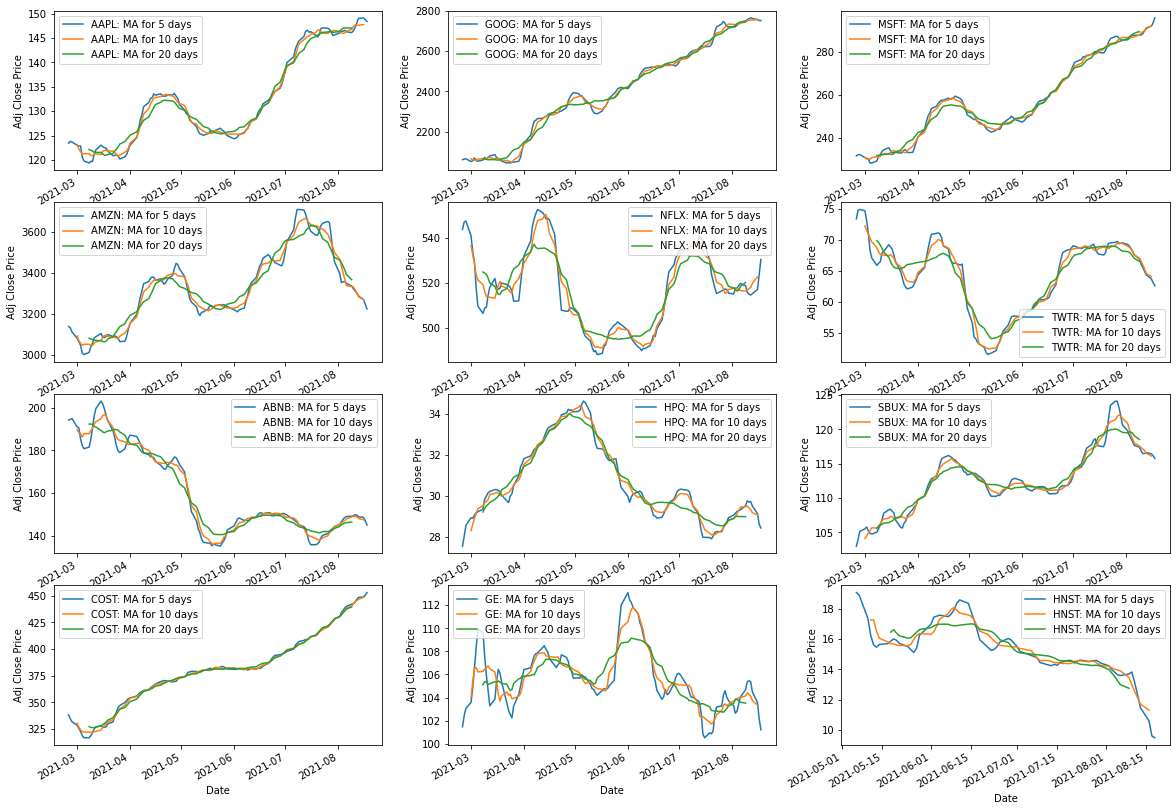

In [6]:
plt.figure(figsize=(20, 15))

for i, stock in enumerate(stock_list, 1):
    plt.subplot(4, 3, i)
    for ma in ma_day:
        df_ma[f"{stock}: MA for {ma} days"].plot()
    plt.legend()    
    plt.ylabel('Adj Close Price')

- Moving average makes the curves smooth, and help to better understand a trend for each stock. 
- For example, the adjusted close price for Google is close to linear increasing after 2021-04. 
- It is unclear how much window can help to predict future prices, but it helps to see long-term prediction by filtering out small changes. 
- Moving average will be used as one of prediction models later, and the preformance will be compared.   

## 3. Seasonal decomposition

### Seasonality analysis

In [7]:
df_close.head()

Symbols,AAPL,GOOG,MSFT,AMZN,NFLX,TWTR,ABNB,HPQ,SBUX,COST,GE,HNST
Date,,,,,,,,,,,,
2021-02-22,126.000000,2064.879883,234.509995,3180.739990,533.780029,70.489998,195.339996,27.120001,101.809998,350.209991,100.000000,NaN
2021-02-23,125.860001,2070.860107,233.270004,3194.500000,546.150024,73.169998,187.589996,27.379999,101.370003,342.149994,100.720001,NaN
2021-02-24,125.349998,2095.169922,234.550003,3159.530029,553.409973,71.919998,200.199997,27.969999,104.379997,340.700012,104.959999,NaN
2021-02-25,120.989998,2031.359985,228.990005,3057.159912,546.700012,74.589996,182.059998,28.190001,103.470001,333.899994,102.080002,NaN
2021-02-26,121.260002,2036.859985,232.380005,3092.929932,538.849976,77.059998,206.350006,28.969999,108.029999,331.000000,100.320000,NaN


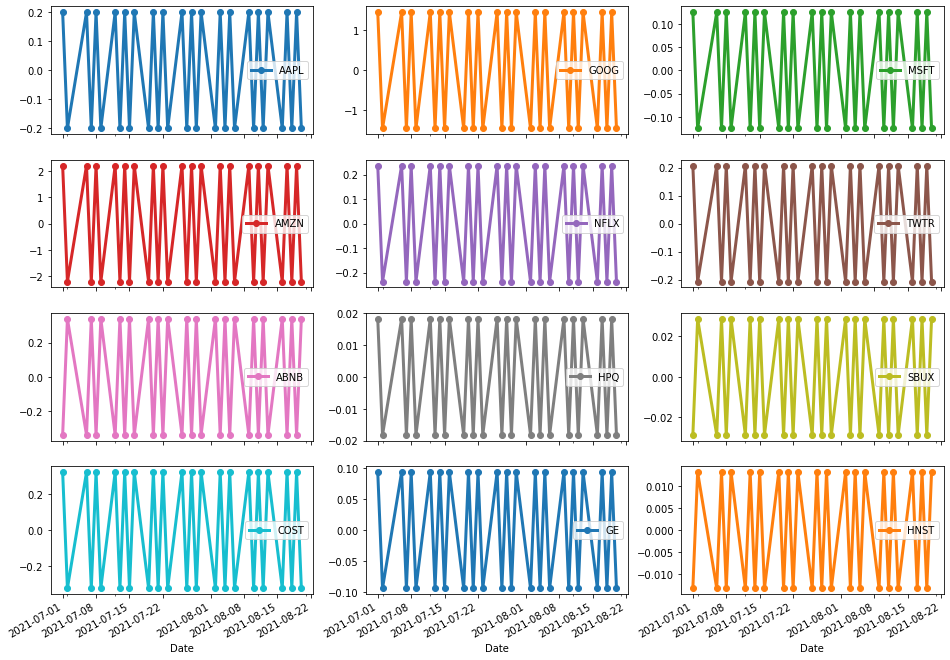

In [8]:
import statsmodels.api as sm

seasonal_dict={}

for stock in stock_list:   
    decomposition = sm.tsa.seasonal_decompose(df_close[stock].dropna(), period=2)
    seasonal_dict[stock] = decomposition.seasonal

pd.DataFrame(seasonal_dict)['2021-07':].plot(subplots=True, layout=(4,3), linewidth=3, marker='o', figsize=(16,12));
# pd.DataFrame(seasonal_dict)['2021-03':].plot(subplots=True, layout=(4, 3), linewidth=3, figsize=(16,14));

- Each has a pattern with a certain period. All have similar periods, but have different patterns. Need to figure out what cause the periodic patterns.
- The period of the waves is 7 days, a week. The close prices only change on weekdays when the days stock market opens. When the seasonal_decompose() function calculates seasonality, it uses price changes over time differences, and two prices right before and after weekends have longer time differences. That causes seasonality to have a weekly pattern. Unfortunately, through theses plots, seasonality is not clearly shown.   

### Trend analysis

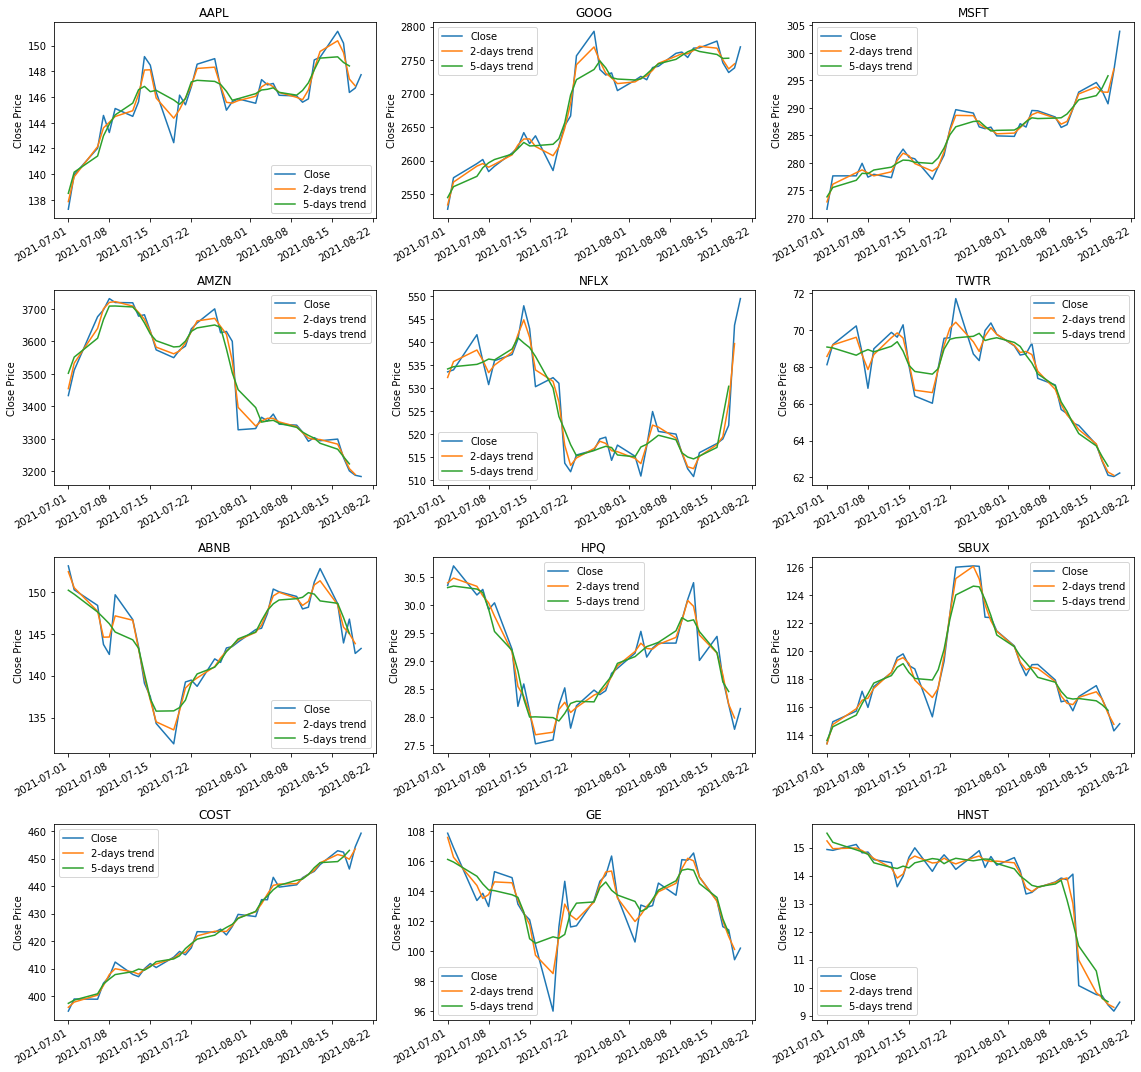

In [9]:
trend_dict={}
trend_dict2={}

plt.figure(figsize=(16, 15))

for stock in stock_list:   
    decomposition = sm.tsa.seasonal_decompose(df_close[stock].dropna(), period=2)
    decomposition2 = sm.tsa.seasonal_decompose(df_close[stock].dropna(), period=5)
    trend_dict[stock] = decomposition.trend
    trend_dict2[stock] = decomposition2.trend

for i, stock in enumerate(stock_list, 1):
    plt.subplot(4, 3, i)
    
    df_close[stock]['2021-07':].plot()

    trend_dict[stock]['2021-07':].plot()
    trend_dict2[stock]['2021-07':].plot()
    
    plt.xlabel(None)
    plt.ylabel('Close Price')
    plt.legend(['Close','2-days trend','5-days trend'])
    plt.title(f'{stock}')

plt.tight_layout()
# pd.DataFrame(trend_dict['AAPL'])['2021-03':].plot(subplots=True, layout=(4, 2), linewidth=3, figsize=(16,14));

- The plots show a trend very well and seem to track well and smoothly
- But it cannot be used since it uses future data just to show trend as its name.
- The plot definitely helps to better understand a trend.
- 5 days (one week) period removes daily peaks.

### Noise

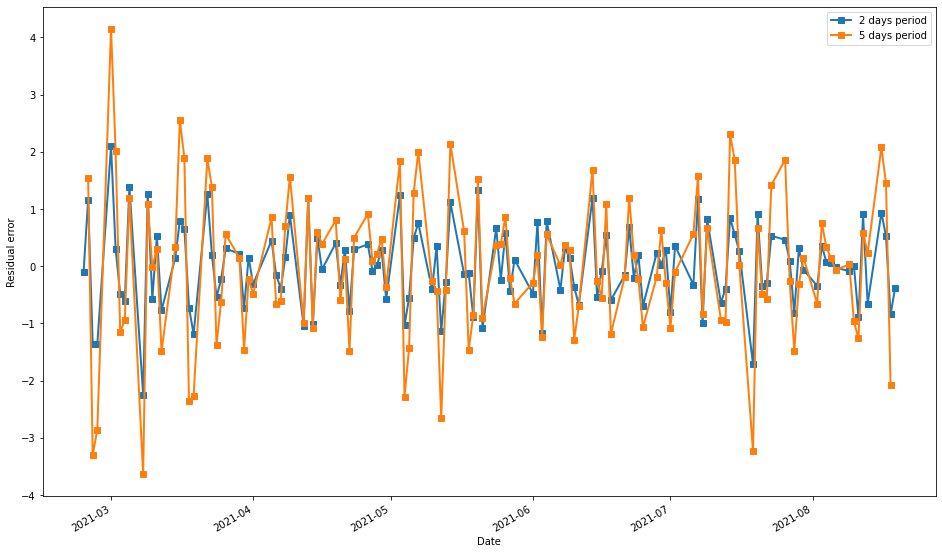

In [10]:
resid_dict={}
resid_dict2={}

for stock in stock_list:   
    decomposition = sm.tsa.seasonal_decompose(df_close[stock].dropna(), period=2)
    decomposition2 = sm.tsa.seasonal_decompose(df_close[stock].dropna(), period=5)
    resid_dict[stock] = decomposition.resid
    resid_dict2[stock] = decomposition2.resid

pd.DataFrame(resid_dict['AAPL']).plot(subplots=False, linewidth=2, marker='s', figsize=(16,10));
plt.plot(pd.DataFrame(resid_dict2['AAPL']), linewidth=2, marker='s');
plt.legend(['2 days period', '5 days period'])
plt.ylabel('Residual error')
plt.show()

# pd.DataFrame(resid_dict['AAPL'])['2021-07':].plot(subplots=False, linewidth=2, marker='s', figsize=(16,10));

# pd.DataFrame(resid_dict)['2021-03':].plot(subplots=True, layout=(4, 2), linewidth=3, figsize=(16,14));

- Most residual errors for AAPL are between 2 and -2 except 2021-03.
- There are unexpected, untrackable changes.
- Each stock has a differect stock price, ranging few dollars to some thousand dollars. To get better views, we need to see percentage of price changes instead of absolute price changes. 

## 4. The accumulated return of the stocks in percentage

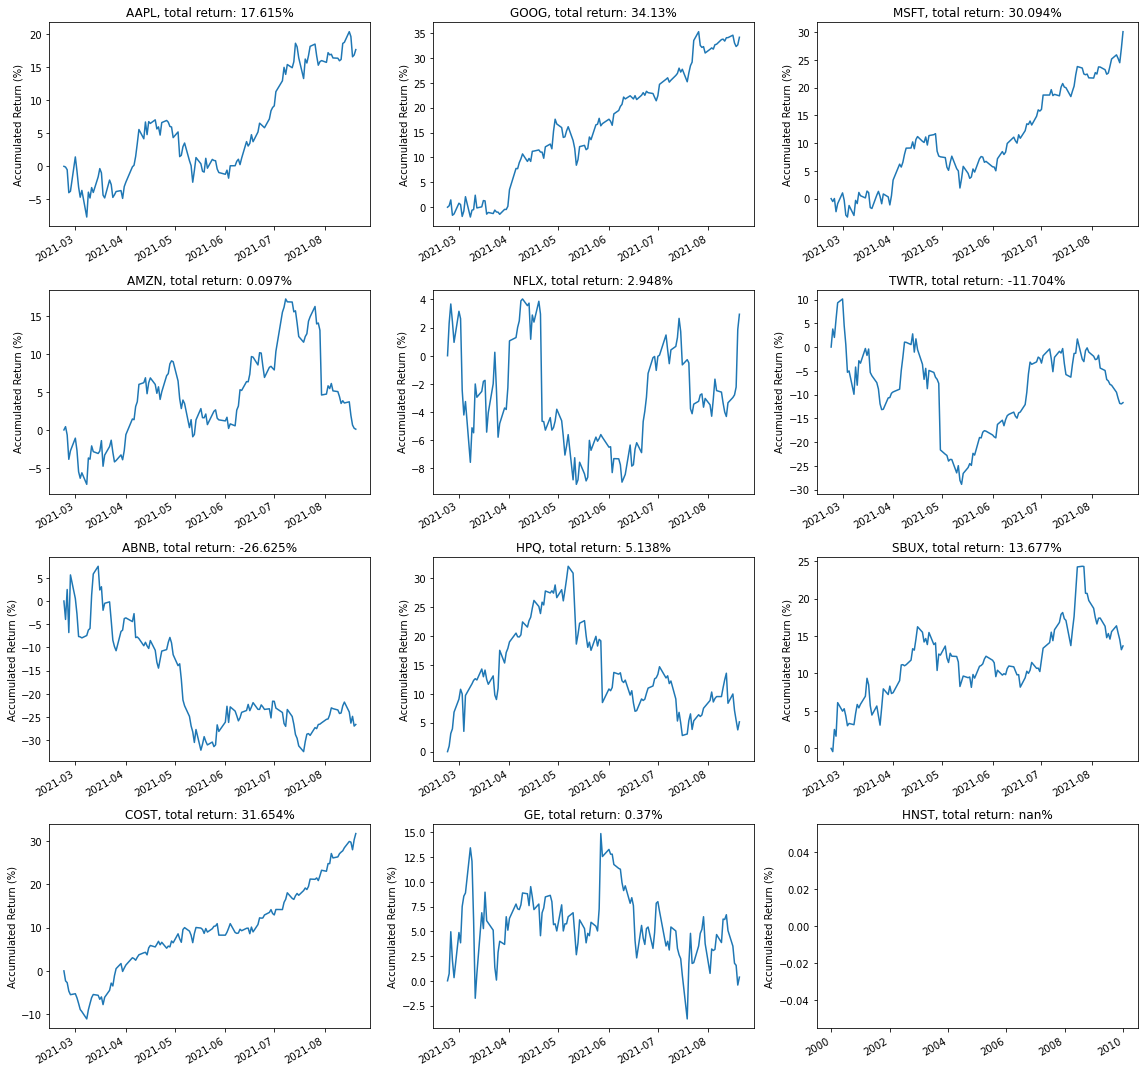

In [11]:
# Accumulated stock price change in percentage 

df_accum = (df_adj_close-df_adj_close.iloc[0])/df_adj_close.iloc[0]*100

plt.figure(figsize=(16, 15))

for i, stock in enumerate(stock_list, 1):
    plt.subplot(4, 3, i)
    df_accum[stock].plot()
    plt.xlabel(None)
    plt.ylabel('Accumulated Return (%)')
    plt.title(f'{stock}, total return: {round(df_accum[stock][-1],3)}%')
    
plt.tight_layout()

- With these plots and numbers, we can better compare profits and losses between stocks. 
- GOOG & MSFT, NFLX & TWTR seem to have silmilar changes on their return plots. Need to check similarity later.

## 5. The daily return of the stocks

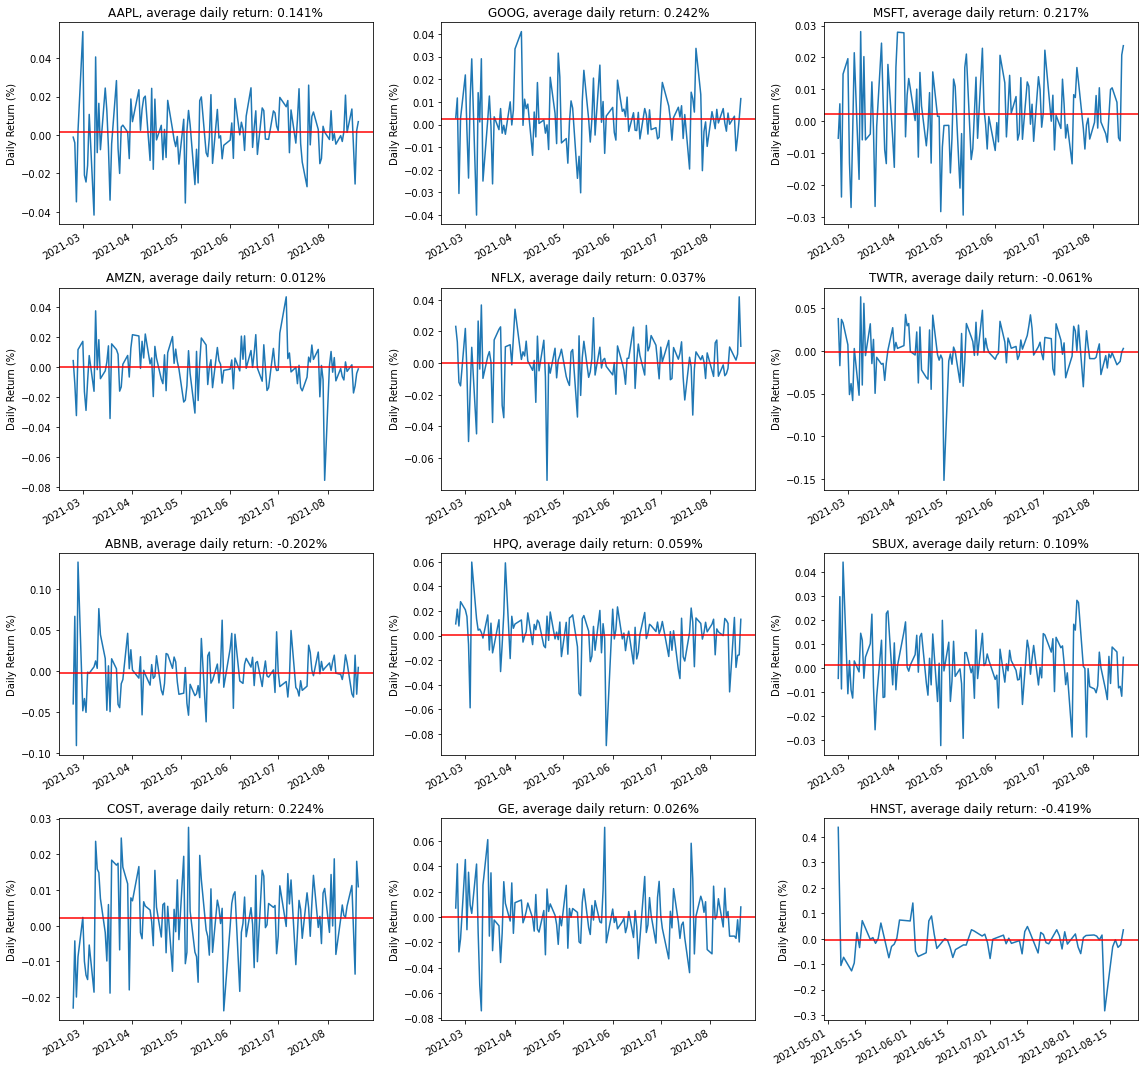

In [12]:
# Percentage change for each day

df_daily = df_adj_close.pct_change()

plt.figure(figsize=(16, 15))

for i, stock in enumerate(stock_list, 1):
    plt.subplot(4, 3, i)
    df_daily[stock].plot()
    m = df_daily[stock].mean()
    #plt.plot(df_daily.index, m*np.ones(len(df_daily[stock])))
    plt.axhline(y = m, color='r')
    plt.xlabel(None)
    plt.ylabel('Daily Return (%)')
    plt.title(f'{stock}, average daily return: {round(m*100, 3)}%')
    
plt.tight_layout()

- Previously, each stock has a different price range. Some are over thousand dollars, and others are less than a hundred dollar. So comparing absolute values is not fair and may miss some important value changes.
- Daily price changes are converted to percentage changes compared to previous day.
- Daily plots switch between over 0 and under 0. 
- Red lines are average daily change in percentage from 2021-02 to 2021-08 (today).
- May need to smooth the line plots to see long-term trends since they seem too noisy.

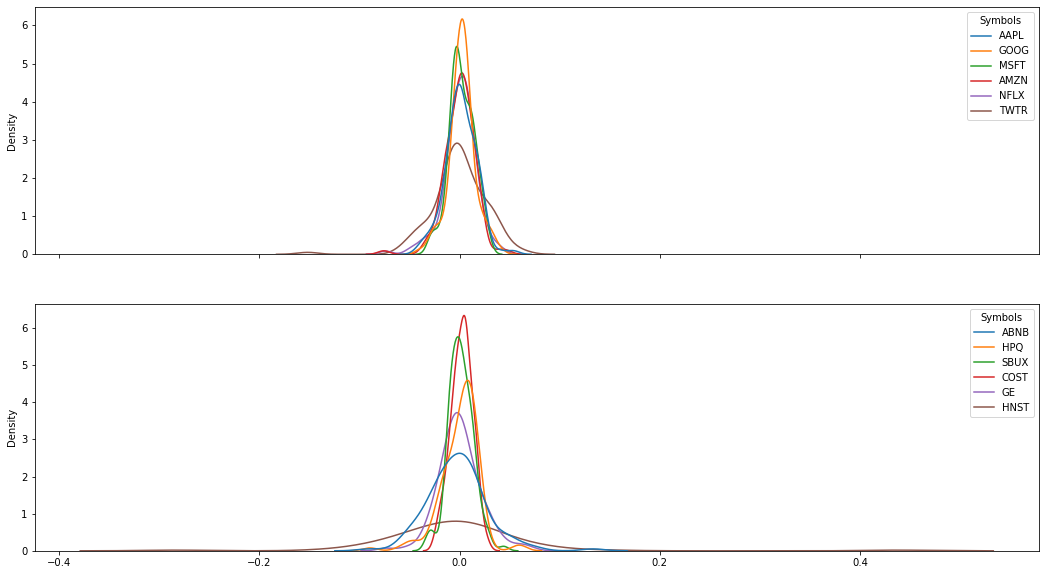

In [78]:
# Histogram for overall look at the average daily return

# for i, stock in enumerate(stock_list, 1):
#     plt.subplot(4, 3, i)
#     sns.displot(df_daily[stock].dropna(), bins=100, kde=True)
#     plt.ylabel('Daily Return')
#     plt.title(f'{stock}')

fig, ax = plt.subplots(2, sharex=True)
#g = sns.displot(df_daily, kde=True)
sns.kdeplot(data=df_daily.iloc[:,:6], ax=ax[0])
sns.kdeplot(data=df_daily.iloc[:,6:], ax=ax[1])
fig.set_figwidth(18)
fig.set_figheight(10)
plt.show()


## 6. The correlation between different stocks close prices

In [ ]:
sns.jointplot(x='GOOG',y='MSFT', data=df_daily, kind='scatter')

In [ ]:
sns.jointplot(data=df_daily, x='NFLX',y='TWTR', color='green')

In [ ]:
g = sns.pairplot(df_daily, kind='reg')
g.map_lower(sns.kdeplot, levels=5, color=".2")

In [ ]:
# return_fig = sns.PairGrid(df_daily.dropna())

# # Set upper triangles using map_upper
# return_fig.map_upper(plt.scatter, color='green')

# # Set lower triangles using map_lower
# return_fig.map_lower(sns.kdeplot, cmap='mako')

# # Set diagonal as histogram
# return_fig.map_diag(plt.hist, bins=30)

In [ ]:
# Use heatmap to visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df_daily.corr('pearson'), annot=True, cmap='summer')

- Linearity doesn't mean causality, but could see some correlation between stocks. There is pretty high correlation betwen Amazon and Apple.
- By eyes, GOOG & MSFT and NFLX & TWTR were predicted to have high correlations, but NFLX & TWTR does not have high correlation by Pearson correlation.
- Generally, tech stocks are highly correlated, and SBUX and COST seem to be correlated with AAPL and GOOG.

### correlation with seasonal decomposition

In [ ]:
# seasonal_dict = {
#     stock: sm.tsa.seasonal_decompose(tech_rets[stock].dropna(), period=2).seasonal for stock in tech_rets.columns
# }

# # Compute corr matrix
# seasonal_dict = pd.DataFrame(seasonal_dict).corr()

# sns.clustermap(seasonal_dict, annot=True, square=True, figsize=(7,7))
# plt.show();

In [ ]:
# trend_dict = {
#     stock: sm.tsa.seasonal_decompose(tech_rets[stock].dropna(), period=2).trend for stock in tech_rets.columns
# }

# Compute corr matrix
trend_corr = pd.DataFrame(trend_dict).corr()
plt.figure(figsize=(10,10))
sns.heatmap(trend_corr, annot=True)
plt.show();

- If the trends from seasonal_decompose() are used for the correlation analysis, then we can see correlations between stocks more clearly.
- COST & SBUX are highly correlated with four tech stocks (AAPL, GOOG, MSFT, AMZN)
- From this plot, NFLX & TWTR shows high correlated as we checked in the plot of raw data of close prices.

## 7. Stability and Gain

In [ ]:
rets = df_daily.dropna()

area = np.pi*20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(30,20), 
                 textcoords='offset points',
#                 ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='->',color='blue'))#,
                                #connectionstyle='arc3, rad=-0.3'))

- HNST has a negative return and a large variance, which may not be purchased.
- COST, MSFT, GOOG, AAPL have relatively high returns and low variances, which is assumed as risk here.
- NFLX, SBUX have lower returns compared to above four stocks, but have lower variances, which means high stability.

## 8. Autocorrelation

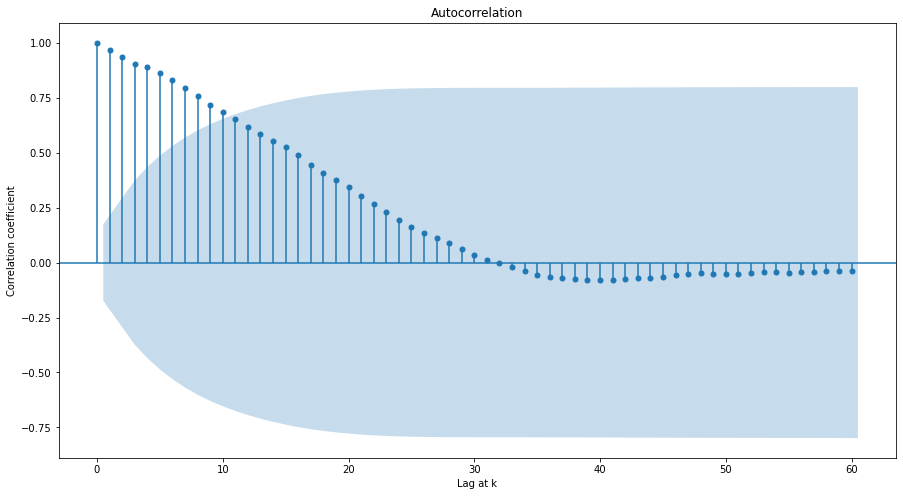

In [208]:
#df = DataReader('AAPL', 'yahoo', start='2021-01-01', end=datetime.now())
AAPL = df_close['AAPL']

from statsmodels.graphics import tsaplots

fig, ax = plt.subplots(figsize=(15,8))
#plt.figure(figsize=(12,10))

# Stands for Time Series Analysis Plots (TSA Plots)
tsaplots.plot_acf(AAPL, lags=60, ax=ax)

plt.xlabel("Lag at k")
plt.ylabel("Correlation coefficient")
plt.show()

- Since correlations close to 0 are higher than those far from 0, they do not show periodicity, which means trendy, not seasonal or periodic. 
- Most correlations are in the shaded area, which is confidence interval. In other words, they are not significant.

## 9. Prediction

### AR, MA, ARMA models
For close price prediction, AR, MA, ARMA, and ARIMA are adapted. Performance metrics here is root mean squared error. It will show how to find proper model order, which is the number of previous data uesd in the model. 

In [214]:
df_close.head()

# Use AR, ARMA, ARIMA for time series modeling and compare maximum likelihood 

from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.tsa.ar_model import AutoReg

ar = ARIMA(AAPL, order=(5,0,0))
ma = ARIMA(AAPL, order=(0,0,5))
arma = ARIMA(AAPL, order=(5,0,5))
arima = ARIMA(AAPL, order=(5,2,5))

res_ar = ar.fit()
print(f"AR likelihood {res_ar.llf}")

res_ma = ma.fit()
print(f"MA likelihood {res_ma.llf}")

res_arma = arma.fit()
print(f"ARMA likelihood {res_arma.llf}")

res_arima = arima.fit()
print(f"ARIMA likelihood {res_arima.llf}")

AR likelihood -264.19845584873985
MA likelihood -305.817539781007
ARMA likelihood -260.6026210377416
ARIMA likelihood -258.0689314463744


- In this case, ARIMA model works best with random selection of order degrees, the number of parameters and so on for each model.
- Information criteria such as AIC, BIC can help to decide a good number of parameters for each model.

In [211]:
# For AR model, find a good number of parameters and decide parameters.

AIC = []
BIC = []
for i in range(20):
    model = ARIMA(AAPL.rolling(2).mean(), order = (i,0,0))
    res = model.fit()
    AIC.append(res.aic)
    BIC.append(res.bic)

    
# For AR model, find a good number of parameters and decide parameters.

AIC_ma = []
BIC_ma = []
for i in range(20):
    model = ARIMA(AAPL.rolling(2).mean(), order = (0,0,i))
    res = model.fit()
    AIC_ma.append(res.aic)
    BIC_ma.append(res.bic)

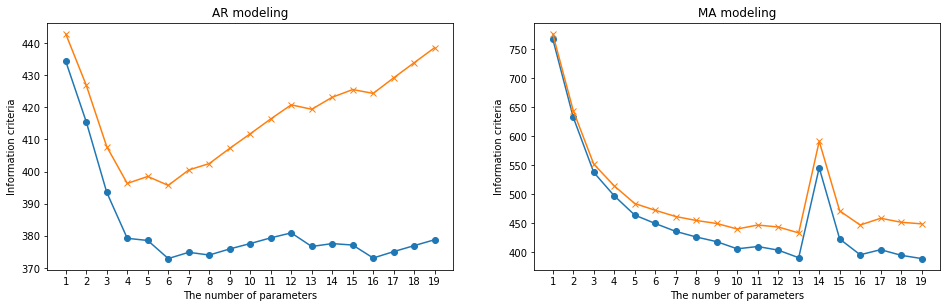

In [212]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
plt.plot(AIC[1:], marker='o')
plt.plot(BIC[1:], marker='x')
plt.xticks(np.arange(19),[i+1 for i in range(19)])
plt.xlabel('The number of parameters')
plt.ylabel('Information criteria')
plt.title('AR modeling')

plt.subplot(2,2,2)
plt.plot(AIC_ma[1:], marker='o')
plt.plot(BIC_ma[1:], marker='x')
plt.xticks(np.arange(19),[i+1 for i in range(19)])
plt.xlabel('The number of parameters')
plt.ylabel('Information criteria')
plt.title('MA modeling')
plt.show()


- Information criteria (AIC, BIC) did not show elbows clearly for both modeling.
- After moving averaging for 2 days to remove glitches, information criteria have elbows to decide a good number of parameters for AR modeling. Six prior data will be used for forecasting.
- MA model is useful to see a trend, but not a good prediction model for close price as shown in the figure below. It plots far from raw data.

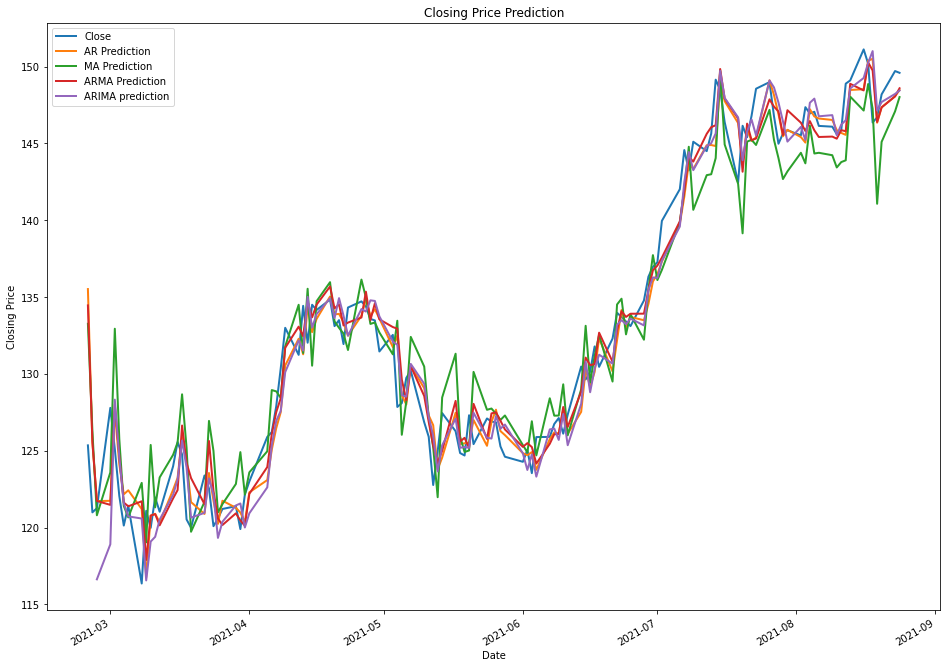

In [215]:
ar = ARIMA(AAPL, order=(6,0,0))
res_ar = ar.fit()
pred_ar = res_ar.predict()

pred_ma = res_ma.predict()
pred_arma = res_arma.predict()
pred_arima = res_arima.predict()

plt.figure(figsize=(16,12))
AAPL.plot(linewidth=2)
plt.plot(pred_ar, linewidth=2)
plt.plot(pred_ma, linewidth=2)
plt.plot(pred_arma, linewidth=2)
plt.plot(pred_arima[2:], linewidth=2)

plt.legend(['Close','AR Prediction', 'MA Prediction', 'ARMA Prediction', 'ARIMA prediction'])
plt.ylabel('Closing Price')
plt.title('Closing Price Prediction')
plt.show()

- Predictions except MA seem to pretty good to track close prices, but need to find out a good way to evaluate performance. 
- Information criteria is a good method to decide model orders since it prevents high complexity while keeping good performance. But for stock price prediction, performance is super important even though the prediction model is complicated.
- Information criteria will be used as a reference, but will try to generate a best performed model.
- Performance is evaluated by root mean squared error.

### AR Model
First, build a model with zero to nine parameters (prior data) 
Second, forecast some future prices
Third, calculate rmse for each model

AR(0) RMSE: 15.73577677612798
AR(1) RMSE: 2.555732542319417
AR(2) RMSE: 2.4868894716557475
AR(3) RMSE: 2.5399942589843225
AR(4) RMSE: 2.1712230683283167
AR(5) RMSE: 2.8474864083969686
AR(6) RMSE: 2.9045105634516926
AR(7) RMSE: 2.9695499058239494
AR(8) RMSE: 2.9094312338058215
AR(9) RMSE: 2.666719737862028


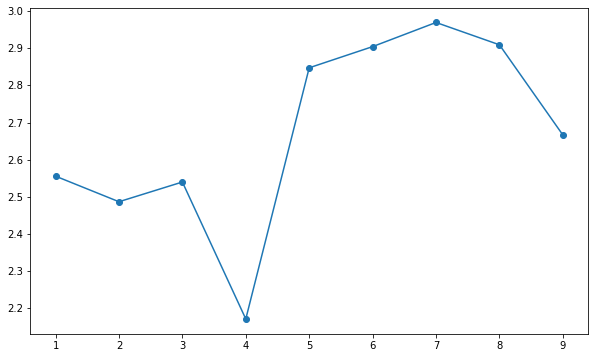

In [220]:
rmse = []
max_n = 10
for i in range(max_n):
    model = ARIMA(AAPL[-120:-6], order=(i,0,0))
    res = model.fit()
    pred = res.forecast(6)
    err = mean_squared_error(AAPL[-6:], pred, squared=False)
    rmse.append(err)
    print(f"AR({i}) RMSE: {err}")

plt.figure(figsize=(10,6))
plt.plot(np.arange(1,max_n), rmse[1:], marker='o')
plt.xticks(np.arange(1,max_n))
plt.show()


- RMSE is used for performance evaluation.
- AR model with only one previous price works best compared to models with more parameters. 
- These models are built using than 4 months stock close prices. Generally, long data help to build a strong model, but since stock prices change by so many other factors, seeing far past data may decrease performance.
- Predict some future prices using each model without re-training. There can be a huge daily change for stock prices, so re-training will increase prediction performance.

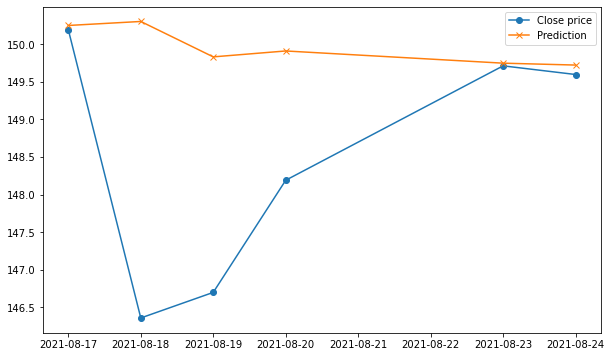

In [223]:
# With AR(4), forecasting 6 future values
# Performance measurement by root mean squared error

model = ARIMA(AAPL[-120:-6], order=(4,0,0))
res = model.fit()

pred = res.forecast(6)

min_rmse = mean_squared_error(AAPL[-6:], pred, squared=False)

plt.figure(figsize=(10,6))
plt.plot(AAPL[-6:], marker='o')
plt.plot(AAPL[-6:].index, pred, marker='x')
plt.legend(['Close price','Prediction'])
plt.show()

In [206]:
# Find a good model by changing training length, model order, validation length
# Train (rebuild) a model for each day with a certain training length and order
# Forecast daily price by a daily built model during a validation length 

from sklearn.metrics import mean_squared_error
from datetime import timedelta

# Model order (number of parameters), training lengths, validation length
order = np.arange(20)
T_length = [10, 20, 50]
V_length = [5, 10]

end = datetime.now()
start = datetime(end.year, end.month-1, end.day)

for o in order:
    for t in T_length:
        for v in V_length:
            pred = []
            for i in range(v):
    #             m2 = datetime(end.year, end.month, end.day-(v+1))
    #             m1 = datetime(m2.year, m2.month, m2.day-t)
#                 m2 = start + timedelta(days=t+i)
#                 m1 = start + timedelta(days=i)

                t_end = start + timedelta(days=i)
                if t_end not in AAPL.index:
                    t_end = t_end + timedelta(days=1)
                if t_end not in AAPL.index:
                    t_end = t_end + timedelta(days=1)
                if t_end not in AAPL.index:
                    t_end = t_end + timedelta(days=1)
                
                AAPL_train = AAPL[:t_end]
                AAPL_val = AAPL[start:]
        
                model = ARIMA(AAPL_train[-t:], order=(o,0,0))
                res = model.fit()
                pred.append(res.forecast())
                
            #print(pred)
            
            rmse = mean_squared_error(AAPL_val[:v], pred, squared=False)
            if rmse < min_rmse:
                min_rmse = rmse
                best_model = (o, t, v)
            
print(best_model)
# (1, 50, 5)
# print(res.predict(AAPL.index[-1], AAPL.index[-1]))
# print(AAPL[-1])

(2, 10, 10)


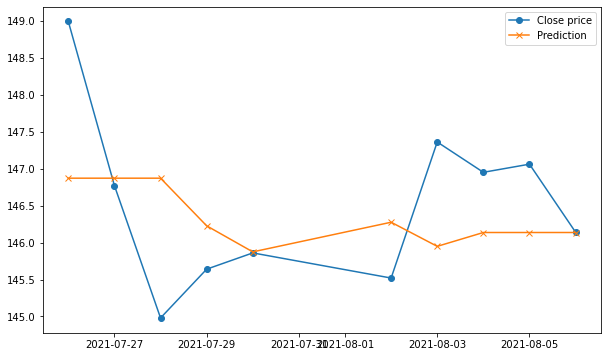

In [237]:
o = best_model[0]
t = best_model[1]
v = best_model[2]

pred = []
for i in range(v):
    t_end = start + timedelta(days=i)
    if t_end not in AAPL.index:
        t_end = t_end + timedelta(days=1)
    if t_end not in AAPL.index:
        t_end = t_end + timedelta(days=1)
    if t_end not in AAPL.index:
        t_end = t_end + timedelta(days=1)
                
    AAPL_train = AAPL[:t_end]
    AAPL_val = AAPL[start:]
        
    model = ARIMA(AAPL_train[-t:], order=(o,0,0))
    res = model.fit()
    pred.append(res.forecast())

plt.figure(figsize=(10,6))
plt.plot(AAPL_val[:v], marker='o')
plt.plot(AAPL_val[:v].index, pred ,marker='x')
plt.legend(['Close price','Prediction'])

- This is a close price prediction using AR model trained daily.
- As shown in likelihood comparision, ARIMA model may outperform. 
- Stock price depends on many factors, and time-series analysis cannot track huge changes.
- But it could track a trend and ignore some jitters.
- For the given dataset, shorter training works better than long training